In [1]:
import numpy as np
import matplotlib.pyplot as plt   
from scipy import stats
import os
import random
from skbio.diversity.alpha import *

In [15]:
path='/home/etienne/data/dataXetien/'
path2='/home/etienne/data/target_dir/'

In [3]:
def go_edge(tseries):
    nregions=tseries.shape[1]
    Blen=tseries.shape[0]
    nedges=int(nregions**2/2-nregions/2)
    iTriup= np.triu_indices(nregions,k=1) 
    gz=stats.zscore(tseries,nan_policy='omit')
    Eseries = gz[:,iTriup[0]]*gz[:,iTriup[1]]
    return Eseries

In [30]:
remove_roi=[55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
            129, 130,  131,  132,  133,  134,  135,  136,  137,  138,  139,  140, 141, 142, 143,144,145,146,147, 27, 101]

In [40]:
data=np.load(path+'EPI_DMN_A30_CNO_Wt89{}_Baseline.npy'.format(34))
data=np.delete(data,remove_roi,axis=1)
data.shape

(2000, 108)

In [42]:
data=np.load(path+'EPI_DMN_A30_CNO_Wt89{}_Baseline.npy'.format(34))
Blen=data.shape[0]
nregions=data.shape[1]-len(remove_roi)
B=np.zeros((8,Blen,nregions))
i=0
for k in [34,36,38,40,41,42,43,44]:
    bold=np.load(path+'EPI_DMN_A30_CNO_Wt89{}_Baseline.npy'.format(k))
    bold=np.delete(bold,remove_roi,axis=1)
    B[i,:,:]=bold
    i+=1

In [17]:
G=np.array([0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ,
       0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51,
       0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62,
       0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73,
       0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84,
       0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95,
       0.96, 0.97])
N=np.array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045,
       0.05 ])

Blen=1500
nregions=148

Bsim=np.zeros((len(G),len(N),Blen,nregions))
for iig, ig in enumerate(G):
    for ii, i in enumerate(N):
        #print('mpr_mouse_A148_G' +str(ig)+'_nsigma' +str(i)+'_alpha0.0.npz')
        bold=np.load(path2+'mpr_mouse_A148_G' +str(ig)+'_nsigma' +str(i)+'_alpha0.0.npz')['Bold_data'][-Blen:,0,:]
        if True not in np.unique(np.isnan(bold)):
            Bsim[iig,ii,:,:]=bold
        else:
            Bsim[iig,ii,:,:]=np.random.rand(Blen,nregions)

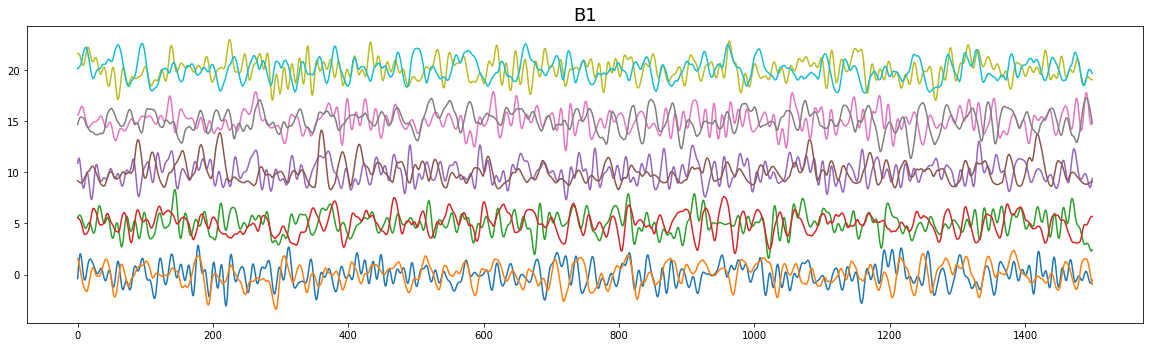

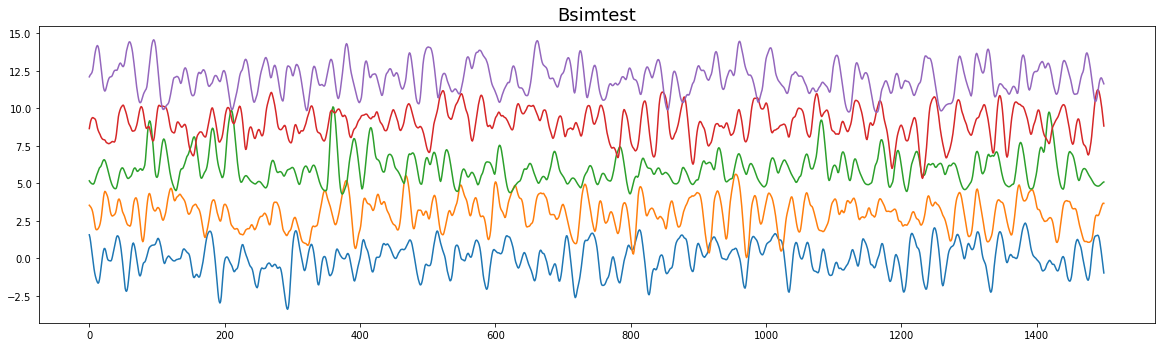

In [23]:
Bsimtest=Bsim[31,9,:,:]
B1=B[0,:,:]

plt.figure(figsize=(20,12))
plt.subplot(211)
plt.title('B1',fontsize=18)
for i in range(5):
    plt.plot(stats.zscore(B1[:1500,i])+5*i)
    plt.plot(stats.zscore(Bsimtest[:,i])+5*i)
plt.figure(figsize=(20,12))
plt.subplot(211)
plt.title('Bsimtest',fontsize=18)
for i in range(5):
    plt.plot(stats.zscore(Bsimtest[:,i])+3*i)

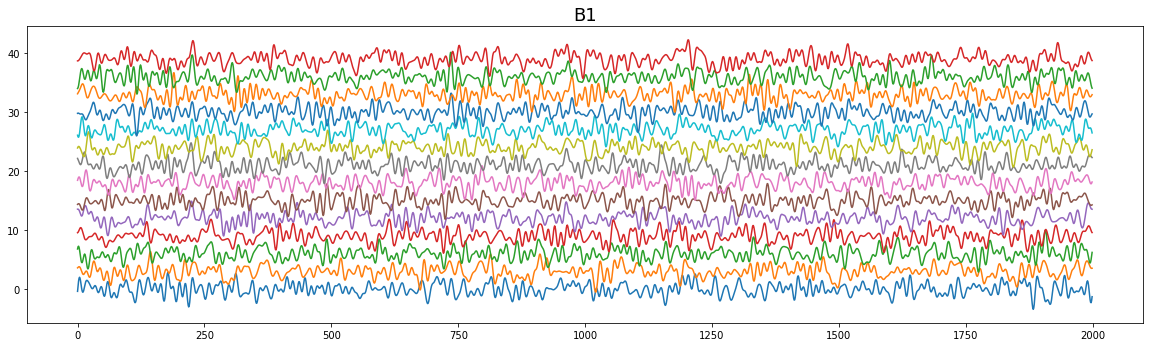

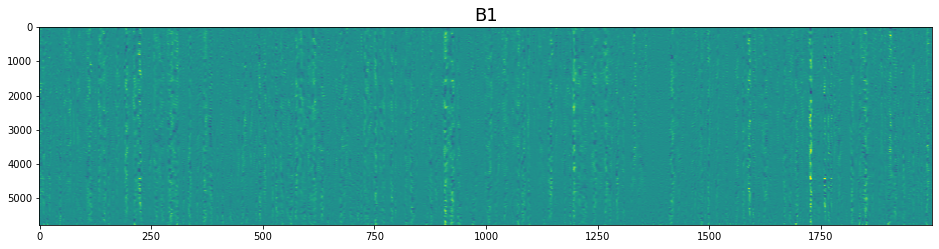

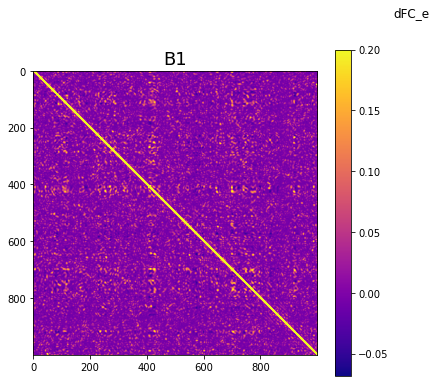

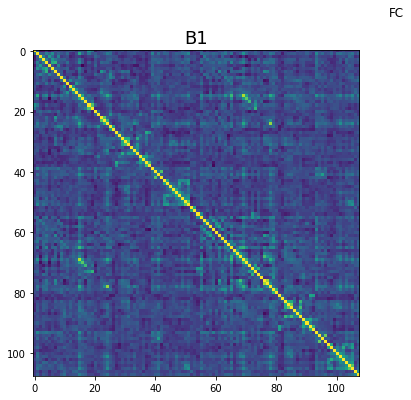

In [43]:
B1=B[0,:,:]
plt.figure(figsize=(20,12))
plt.subplot(211)
plt.title('B1',fontsize=18)
for i in range(14):
    plt.plot(stats.zscore(B1[:,i])+3*i)
    
    
plt.figure(figsize=(16,8))
plt.subplot(211)
plt.title('B1',fontsize=18)
plt.imshow(go_edge(B1).T,vmin=-5.,vmax=5.,aspect='auto')

plt.figure(figsize=(14,6))
plt.suptitle('dFC_e')
plt.subplot(121)
plt.title('B1',fontsize=18)
plt.imshow(np.corrcoef(go_edge(B1[500:1500,:])),vmax=0.2,cmap='plasma')
plt.colorbar()

plt.figure(figsize=(14,6))
plt.suptitle('FC')
plt.subplot(121)
plt.title('B1',fontsize=18)
plt.imshow(np.corrcoef(B1.T))


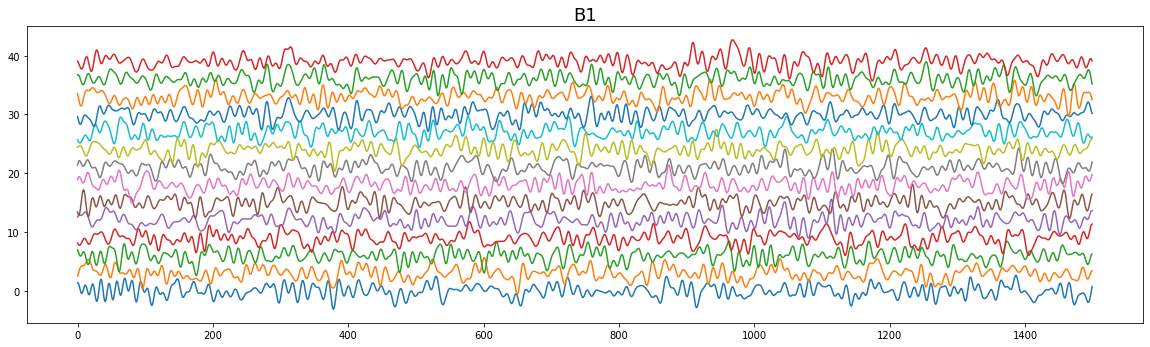

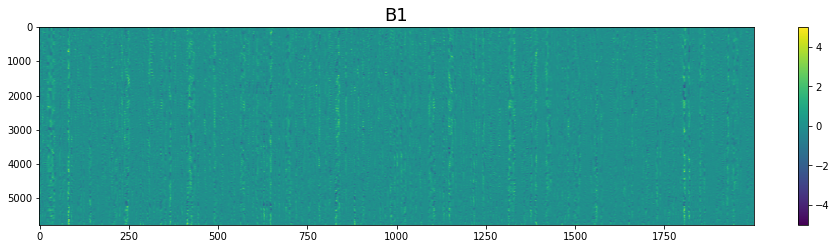

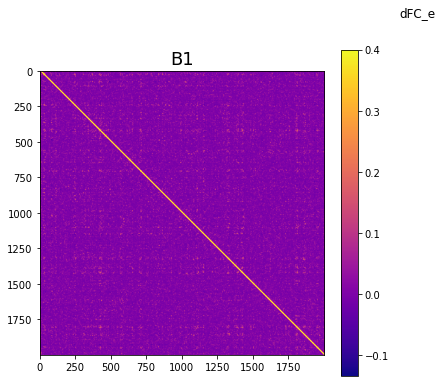

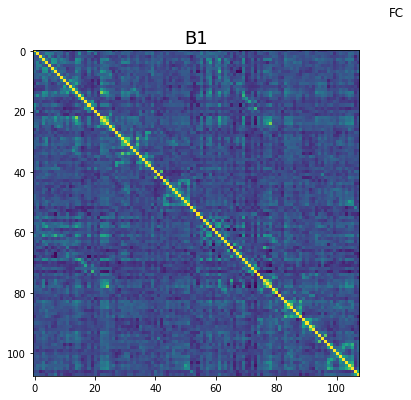

In [54]:
B1=B[1,:,:]
plt.figure(figsize=(20,12))
plt.subplot(211)
plt.title('B1',fontsize=18)
for i in range(14):
    plt.plot(stats.zscore(B1[:1500,i])+3*i)
    
    
plt.figure(figsize=(16,8))
plt.subplot(211)
plt.title('B1',fontsize=18)
plt.imshow(go_edge(B1).T,vmin=-5.,vmax=5.,aspect='auto')
plt.colorbar()

plt.figure(figsize=(14,6))
plt.suptitle('dFC_e')
plt.subplot(121)
plt.title('B1',fontsize=18)
plt.imshow(np.corrcoef(go_edge(B1)),vmax=0.4,cmap='plasma')
plt.colorbar()

plt.figure(figsize=(14,6))
plt.suptitle('FC')
plt.subplot(121)
plt.title('B1',fontsize=18)
plt.imshow(np.corrcoef(B1.T))

In [44]:
def reg_measure(Bold_sim,n=1):
    V=np.var(Bold_sim,axis=0)
    S=np.sum(V[np.argsort(V)[-n::]])
    return(S)

def triangle_measure(Bold_sim):
    C=np.corrcoef(go_edge(Bold_sim))
    T=C[np.triu_indices(C.shape[0],k=1)]
    var=np.var(T)
    return(var)

def simpsonbis(Bold_sim):
    C=(np.corrcoef(go_edge(Bold_sim)))
    T=C[np.triu_indices(C.shape[0],k=1)]
    if np.isnan(T).any():
        return(0)
    I=np.unique(np.around(T,decimals=2),return_counts=True)
    return(simpson(I[1]))

In [45]:
def measures(Bold_sim):
    V=np.var(Bold_sim,axis=0)
    S=np.sum(V[np.argsort(V)[-20::]])
    C=(np.corrcoef(go_edge(Bold_sim)))
    T=C[np.triu_indices(C.shape[0],k=1)]
    if np.isnan(T).any():
        return(0)
    var=np.var(T)
    I=np.unique(np.around(T,decimals=2),return_counts=True)
    return(S,var,simpson(I[1]))

def measure_min(Bold,n=100,w=300):
    l=Bold.shape[0]
    m=int((l-w)/n)+1
    M=np.zeros((3,m))
    for k in range(m):
        ones = np.ones(l,dtype=bool)
        ones[k*n:w+k*n]=False
        M[:,k]=measures(Bold[ones,:])
    return(M[:,np.argmin(M[1,:])])

In [46]:
def edges_str(Bold):
    return(np.sqrt(np.sum(go_edge(Bold)**2,axis=1)))

def edges_var(Bold):
    a=edges_str(Bold)
    return(np.sum(np.abs(a[1:]-a[:1999])))

def burstiness_parameter(Bold):
    a=edges_str(Bold)
    sig=np.std(a)
    mu=np.mean(a)
    return((sig-mu)/(sig+mu))

In [95]:
MEASURER=np.zeros(8)
MEASURES=np.zeros(8)
MEASUREB=np.zeros(8)
MEASUREG=np.zeros(8)
MEASURET=np.zeros(8)

for k in range(8):
    MEASURER[k]=reg_measure(B[k,:,:]/20)
    MEASURES[k]=simpsonbis(B[k,:,:])
    MEASUREB[k]=burstiness_parameter(B[k,:,:])
    MEASUREG[k]=edges_var(B[k,:,:])
    MEASURET[k]=triangle_measure(B[k,:,:])

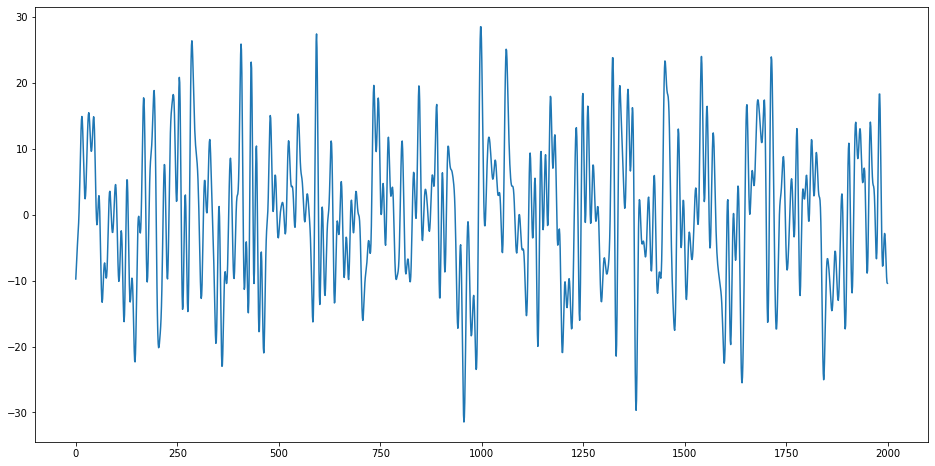

In [62]:
B1=B[7,:,:]

plt.figure(figsize = (16,8))
plt.plot(B1[:,1]-np.mean(B1[:,10]))

In [94]:
MEASURER_sim,MEASURET_sim,MEASURES_sim,MEASUREG_sim,MEASUREB_sim,G,N=np.load('measure_stim.npy')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f44efbbf070>,
 'caps': [<matplotlib.lines.Line2D at 0x7f44efbbf790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f44efbadca0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f44efbbfeb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f44efbc9280>,
 'means': []}

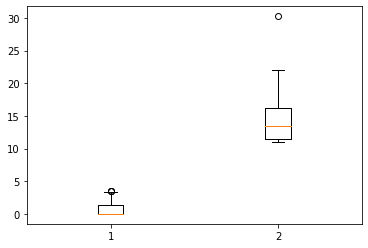

In [96]:
plt.boxplot([MEASURER_sim.flatten(),MEASURER])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f44efb2ed90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f44efb3d4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f44efb2e9d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f44efb3dc10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f44efb3dfa0>,
 'means': []}

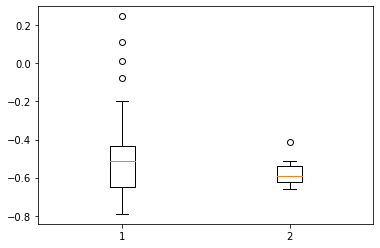

In [97]:
plt.boxplot([MEASUREB_sim[np.isnan(MEASUREB_sim)==False].flatten(),MEASUREB])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f44efab5400>,
 'caps': [<matplotlib.lines.Line2D at 0x7f44efab5b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f44efab5070>,
 'medians': [<matplotlib.lines.Line2D at 0x7f44efac0280>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f44efac0610>,
 'means': []}

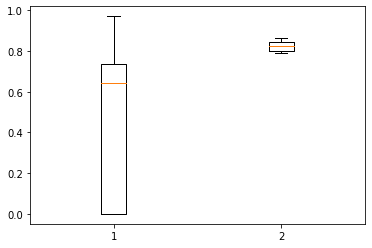

In [98]:
plt.boxplot([MEASURES_sim[np.isnan(MEASURES_sim)==False].flatten(),MEASURES])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f44efa2abb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f44efa39310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f44efa2a7c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f44efa39a30>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f44efa39dc0>,
 'means': []}

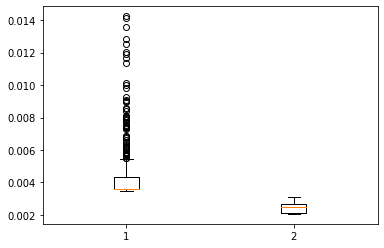

In [99]:
plt.boxplot([MEASURET_sim[np.isnan(MEASURET_sim)==False].flatten(),MEASURET])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f44ef99aa60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f44ef92b1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f44ef99a790>,
 'medians': [<matplotlib.lines.Line2D at 0x7f44ef92b8e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f44ef92bc70>,
 'means': []}

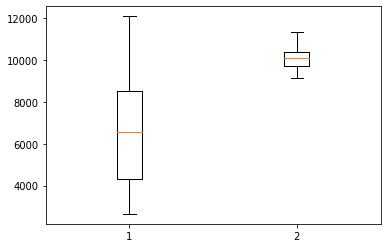

In [101]:
plt.boxplot([MEASUREG_sim[np.isnan(MEASUREG_sim)==False].flatten(),MEASUREG])

In [52]:
MEASURET

array([0.00213586, 0.00206214, 0.00257822, 0.00242254, 0.00312759,
       0.00289831, 0.00208559, 0.00260731])

In [53]:
MEASUREG

array([10212.8895346 ,  9291.62996936, 10078.80199302, 10054.91195926,
       11345.15448141, 10820.0885751 ,  9110.01182484,  9828.0284375 ])